# KNN exercise with NBA player data

## Introduction

- NBA player statistics from 2014-2015 (partial season):
- **Goal:** Predict player position using assists, steals, blocks, turnovers, and personal fouls

## Step 1: Read the data into Pandas

In [1]:
# read the data into a DataFrame
import pandas as pd
nba = pd.read_csv('data/NBA_players_2015.csv', index_col=0)

In [2]:
nba.head()

,season_end,player,pos,age,bref_team_id,g,gs,mp,fg,fga,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,2015,Quincy Acy,F,24,NYK,52,21,19.2,2.2,4.6,...,15.1,14.7,0.6,0.5,1.0,0.050,-2.6,-0.7,-3.4,-0.3
1,2015,Jordan Adams,G,20,MEM,18,0,7.3,1.0,2.1,...,15.9,17.7,0.0,0.2,0.2,0.076,-2.3,1.8,-0.5,0.0
2,2015,Steven Adams,C,21,OKC,51,50,24.2,3.0,5.5,...,19.2,14.8,1.0,1.8,2.8,0.109,-2.0,2.0,-0.1,0.6
3,2015,Jeff Adrien,F,28,MIN,17,0,12.6,1.1,2.6,...,12.9,14.1,0.2,0.2,0.4,0.093,-2.6,0.8,-1.8,0.0
4,2015,Arron Afflalo,G,29,TOT,60,54,32.5,5.0,11.8,...,10.9,19.6,1.4,0.7,2.1,0.051,-0.2,-1.4,-1.6,0.2


In [3]:
# examine the columns
nba.columns

Index(['season_end', 'player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp',
       'fg', 'fga', 'fg_', 'x3p', 'x3pa', 'x3p_', 'x2p', 'x2pa', 'x2p_', 'ft',
       'fta', 'ft_', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM',
       'BPM', 'VORP'],
      dtype='object')

In [4]:
# examine the positions
nba.pos.value_counts()

G    200
F    199
C     79
Name: pos, dtype: int64

## Step 2: Create X and y

Use the following features: assists, steals, blocks, turnovers, personal fouls

In [5]:
# map positions to numbers
nba['pos_num'] = nba.pos.map({'C':0, 'F':1, 'G':2})

In [6]:
# create feature matrix (X)
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']
X = nba[feature_cols]

In [7]:
# alternative way to create X
X = nba.loc[:, 'ast':'pf']

In [8]:
# create response vector (y)
y = nba.pos_num

## Step 3: Train a KNN model (K=5)

In [9]:
# import class
from sklearn.neighbors import KNeighborsClassifier

In [10]:
# instantiate with K=5
knn = KNeighborsClassifier(n_neighbors=5)

In [11]:
# fit with data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Step 4: Predict player position and calculate predicted probability of each position

Predict for a player with these statistics: 1 assist, 1 steal, 0 blocks, 1 turnover, 2 personal fouls

In [12]:
# create a list to represent a player
player = [1, 1, 0, 1, 2]

In [13]:
# make a prediction
knn.predict([player])

array([2], dtype=int64)

In [14]:
# calculate predicted probabilities
knn.predict_proba([player])

array([[0. , 0.2, 0.8]])

## Step 5: Repeat steps 3 and 4 using K=50

In [15]:
# repeat for K=50
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X, y)
knn.predict([player])

array([1], dtype=int64)

In [16]:
# calculate predicted probabilities
knn.predict_proba([player])

array([[0.06, 0.62, 0.32]])

## Bonus: Explore the features to decide which ones are predictive

In [17]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [18]:
# description of assists grouped by position
nba.groupby('pos').ast.describe().unstack()

       pos
count  C       79.000000
       F      199.000000
       G      200.000000
mean   C        0.945570
       F        1.173367
       G        2.729000
std    C        0.858263
       F        1.086252
       G        2.128287
min    C        0.000000
       F        0.000000
       G        0.000000
25%    C        0.400000
       F        0.450000
       G        1.100000
50%    C        0.800000
       F        0.900000
       G        2.250000
75%    C        1.150000
       F        1.500000
       G        3.800000
max    C        4.400000
       F        7.300000
       G       10.200000
dtype: float64

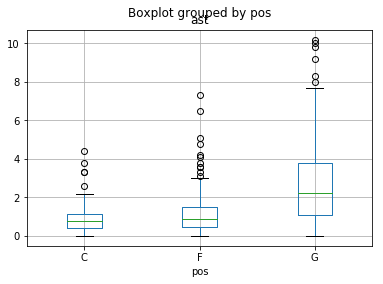

In [19]:
# box plot of assists grouped by position
nba.boxplot(column='ast', by='pos')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x083A0590>,
      dtype=object)

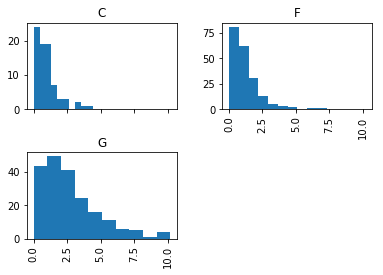

In [20]:
# histogram of assists grouped by position
nba.hist(column='ast', by='pos', sharex=True)